In [2]:
import pandas as pd
import numpy as np
from astropy.time import Time
import matplotlib.pyplot as plt


In [3]:
# Convert the data into allesfitter-compliant format
def convert_to_scientific_notation(input_csv, output_csv=None):
    # Read the CSV file into a DataFrame unless a DataFrame is passed
    if isinstance(input_csv, str):
        df = pd.read_csv(input_csv)
    else:
        df = input_csv
        
    # Apply scientific notation with 18 digits after the decimal to each column
    for col in df.columns:
        # Check if the column is of a numeric type
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].apply(lambda x: format(x, '.18e'))

    # If an output file is specified, save the result to this file
    if output_csv:
        df.to_csv(output_csv, index=False)
    else:
        # Otherwise, return the DataFrame
        return df


# df_formatted = convert_to_scientific_notation(df1)


In [4]:
# Now handle the WINE files
def convert_dat_to_csv(dat_file, csv_file):
    # Read the .dat file, skipping the first line
    df = pd.read_csv(dat_file, delim_whitespace=True, skiprows=1, header=None, names=['time', 'flux', 'flux_err'])

    # Convert BJD to MJD (simplified conversion)
    # df['time'] = df['time'] - 2400000.5

    # If the filename contains CHAT, then do 1 - value as the diff is reversed and normalize around 1.0. Convert from string to float first
    if 'CHAT' in dat_file or 'LC_OMES1' in dat_file:
        df['flux'] = df['flux'].apply(lambda x: 1.0 - float(x))
        
    # Apply scientific notation with 18 digits after the decimal
    for col in df.columns:
        df[col] = df[col].apply(lambda x: format(x, '.18e'))
            
    # Write to a CSV file with a new header
    with open(csv_file, 'w') as f:
        f.write('#time,flux,flux_err\n')
        df.to_csv(f, index=False, header=False)
    # Delete empty lines
    with open(csv_file, 'r') as f:
        lines = f.readlines()
    with open(csv_file, 'w') as f:
        f.writelines([line for line in lines if line.strip()])    
    
    
convert_dat_to_csv('../data/wine/raw/LC_CHAT_20191110_TIC382200986.01-i_mags.dat', '../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
# Also for the OMES files, LC_OMES_20211119_TIC382200986.01-r_norm_flux and LC_OMES_20221124_TIC382200986.01-i_norm_flux
convert_dat_to_csv('../data/wine/raw/LC_OMES_20211119_TIC382200986.01-r_norm_flux.dat', '../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
convert_dat_to_csv('../data/wine/raw/LC_OMES_20221124_TIC382200986.01-i_norm_flux.dat', '../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')
convert_dat_to_csv('../data/wine/raw/LC_OMES1_20231129_TIC382200986.01-r.dat', '../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv')


<Axes: xlabel='time', ylabel='flux'>

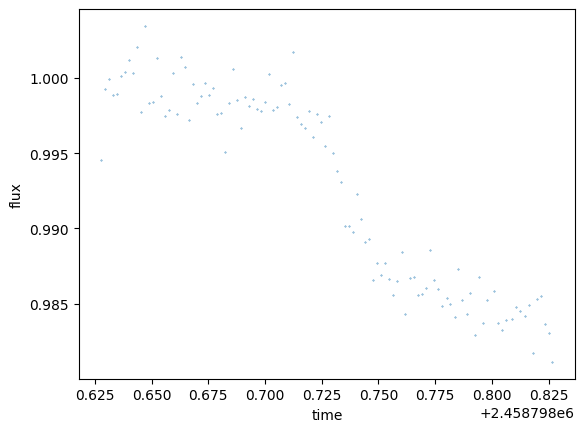

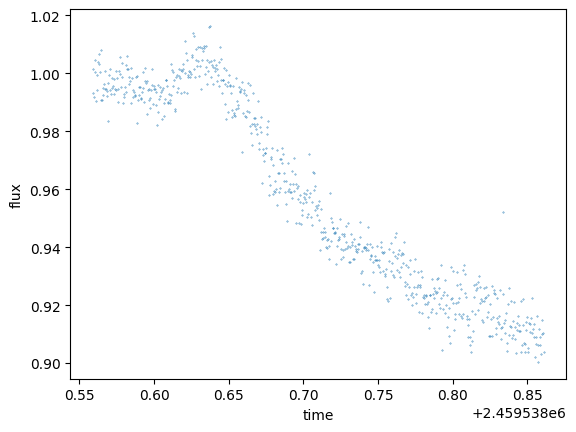

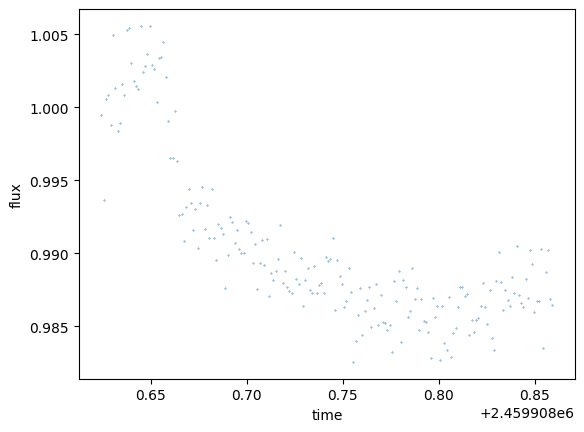

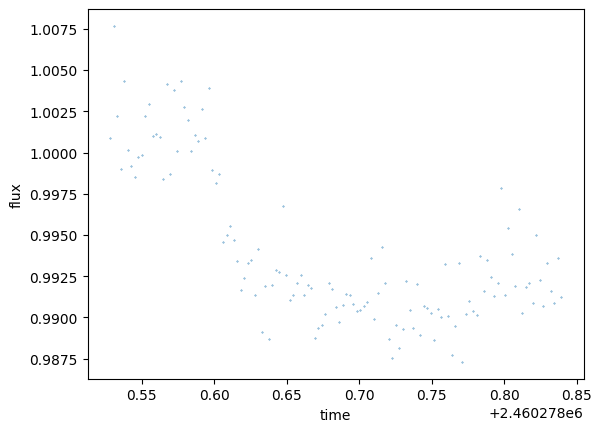

In [5]:
# Load the above 4 files
df1 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
df2 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
df3 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')
df4 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv')

# Remove the # from the first line of each of the above 3 files
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')
df4.columns = df4.columns.str.replace('#', '')

# Plot the data
df1.plot(x='time', y='flux', kind='scatter', s=0.1)
df2.plot(x='time', y='flux', kind='scatter', s=0.1)
df3.plot(x='time', y='flux', kind='scatter', s=0.1)
df4.plot(x='time', y='flux', kind='scatter', s=0.1)

In [6]:
# If the time is higher than 2458000, then subtract 2458000 from it
if df1['time'].max() > 2458000:
    # Modify the files by substracting 2458000 from the time column
    df1['time'] = df1['time'] - 2458000
    df2['time'] = df2['time'] - 2458000
    df3['time'] = df3['time'] - 2458000
    df4['time'] = df4['time'] - 2458000

    # Save the modified files
    df1.to_csv('../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv', index=False)
    df2.to_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv', index=False)
    df3.to_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv', index=False)
    df4.to_csv('../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv', index=False)

# Now convert the above 4 files to scientific notation
df1_formatted = convert_to_scientific_notation(df1)
df2_formatted = convert_to_scientific_notation(df2)
df3_formatted = convert_to_scientific_notation(df3)
df4_formatted = convert_to_scientific_notation(df4)

# Change the first column from scientific notation to float with 5 digits after the decimal, which is precise to the second
df1_formatted['time'] = df1_formatted['time'].apply(lambda x: format(float(x), '.5f'))
df2_formatted['time'] = df2_formatted['time'].apply(lambda x: format(float(x), '.5f'))
df3_formatted['time'] = df3_formatted['time'].apply(lambda x: format(float(x), '.5f'))
df4_formatted['time'] = df4_formatted['time'].apply(lambda x: format(float(x), '.5f'))


# Save the formatted files
df1_formatted.to_csv('../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv', index=False)
df2_formatted.to_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv', index=False)
df3_formatted.to_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv', index=False)
df4_formatted.to_csv('../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv', index=False)

In [7]:
# Add the # back to the first line of each of the above 4 files
# Comment the first line of each of the above 4 files with #
for filename in ['LC_CHAT_20191110_TIC382200986.01-i_mags.csv', 'LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv', 'LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv', 'LC_OMES1_20231129_TIC382200986.01-r.csv']:
    with open('../data/wine/allesfitter_converted_2458/' + filename, 'r') as f:
        lines = f.readlines()
    lines[0] = '#' + lines[0]
    with open('../data/wine/allesfitter_converted_2458/' + filename, 'w') as f:
        f.writelines(lines)
        


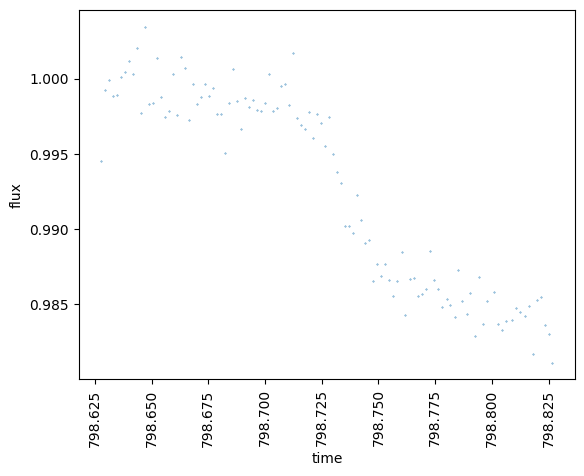

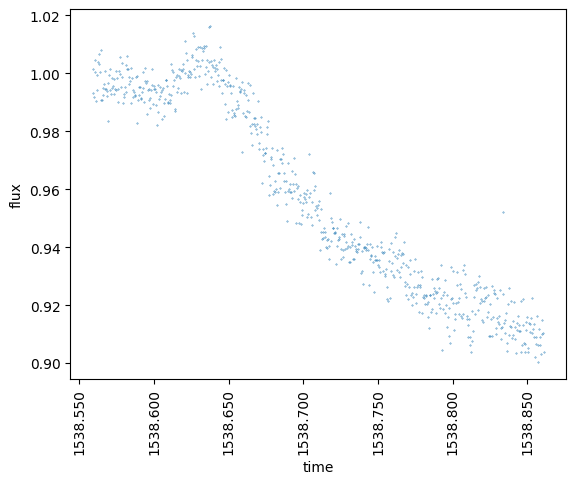

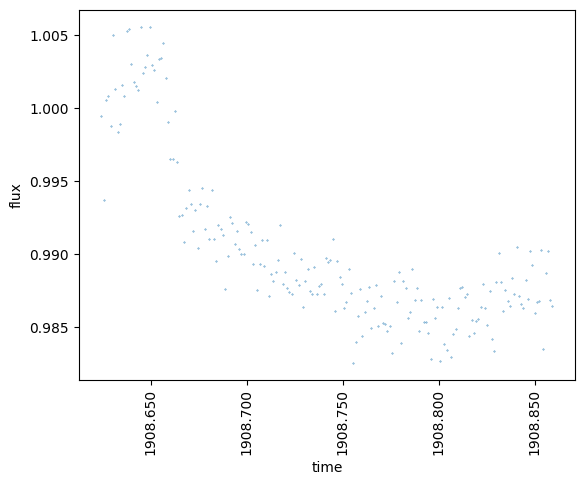

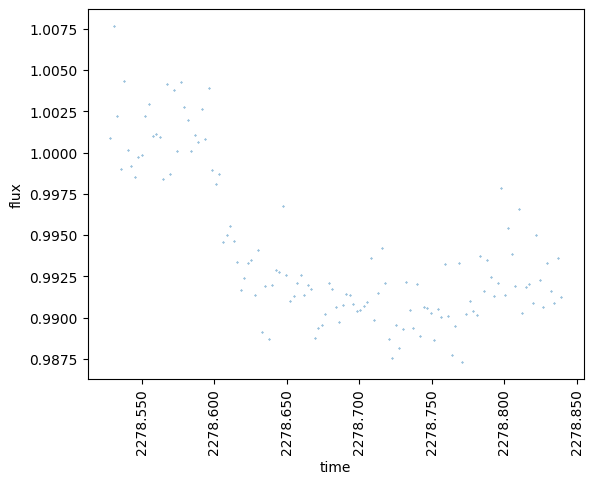

In [8]:
# Load the above 4 files
df1 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_CHAT_20191110_TIC382200986.01-i_mags.csv')
df2 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20211119_TIC382200986.01-r_norm_flux.csv')
df3 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES_20221124_TIC382200986.01-i_norm_flux.csv')
df4 = pd.read_csv('../data/wine/allesfitter_converted_2458/LC_OMES1_20231129_TIC382200986.01-r.csv')

# Remove the # from the first line of each of the above 3 files
df1.columns = df1.columns.str.replace('#', '')
df2.columns = df2.columns.str.replace('#', '')
df3.columns = df3.columns.str.replace('#', '')
df4.columns = df4.columns.str.replace('#', '')

# Plot the data with the x axis with angled ticks and written in full values
df1.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
# df2.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}')).figure.axes[0].set_xlabel('Time (BJD+2458000)')
df2.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
df3.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
df4.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))


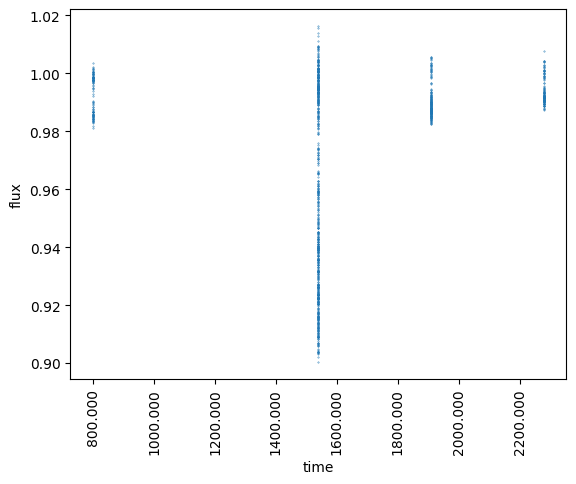

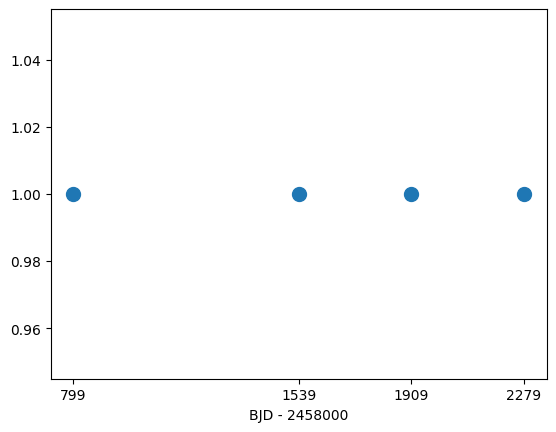

In [9]:
# Combine the above 4 dfs into one and plot it
df = pd.concat([df1, df2, df3, df4])
df.plot(x='time', y='flux', kind='scatter', s=0.1, rot=90).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# For each df, drop all except the first row
df1 = df1.iloc[0:1]
df2 = df2.iloc[0:1]
df3 = df3.iloc[0:1]
df4 = df4.iloc[0:1]

# Combine the above 4 dfs into one and plot it
df = pd.concat([df1, df2, df3, df4])
# df.plot(x='time', y='flux', kind='scatter', s=0.1, rot=0).get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))

# Change each value of flux to exactly 1.0
df['flux'] = 1.0

# Plotting
fig, ax = plt.subplots()
scatter = ax.scatter(df['time'], df['flux'], s=100)

# Customizing the x-axis to show labels only at data points
ax.set_xticks(df['time'])
ax.set_xticklabels([f'{x:.0f}' for x in df['time']], rotation=0)
ax.set_xlabel("BJD - 2458000")

plt.show()

In [10]:
# Export df to a csv file in ./tmp_csvs_single_per_obs
df.to_csv('./tmp_csvs_single_per_obs/wine.csv', index=False)
